In [1]:
# 식사에서의 tip 데이터
import seaborn as sns
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
df.corr()   #상관도

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


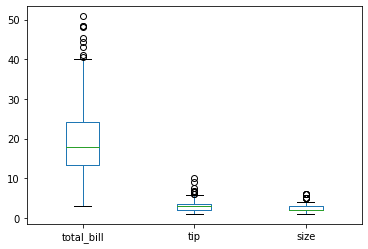

In [5]:
## 박스플롯 제작
#%%
import matplotlib.pyplot as plt
df.plot(kind='box')

,total_bill,tip,size
total_bill,1.000000,0.623702,0.558761
tip,0.623702,1.000000,0.453050
size,0.558761,0.453050,1.000000


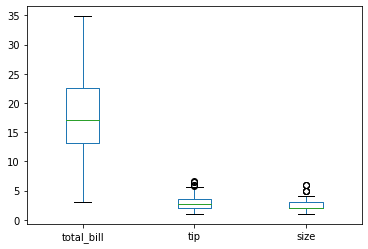

In [6]:
tmp=df[df['total_bill']<=35]
tmp.plot(kind='box')
tmp.corr()

,total_bill,tip,size
total_bill,1.000000,0.670499,0.569582
tip,0.670499,1.000000,0.456563
size,0.569582,0.456563,1.000000


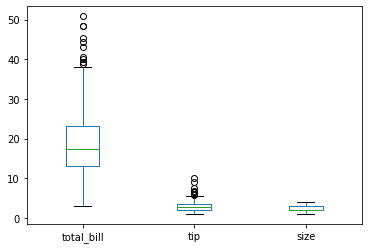

In [7]:
tmp=df[df['size']<=4]
tmp.plot(kind='box')
tmp.corr()

In [8]:
## 산점도 차트 작성, 히스토그램 작성

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


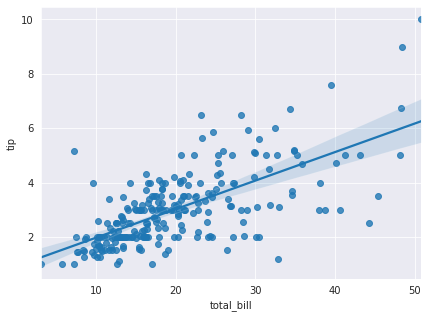

In [15]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,1)

sns.regplot(x='total_bill', y='tip', data=df, ax = ax1)

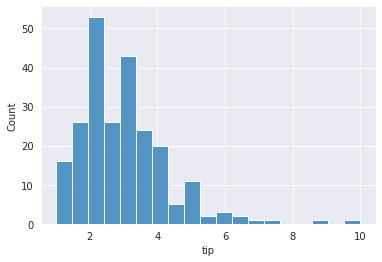

In [33]:
sns.histplot (x='tip', data=tmp)

In [37]:
tmp2 = df[['total_bill', 'tip',	'size']]
tmp2

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [32]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [31]:
## 결측치 : 컴퓨터가 모르는 값, 아무것도 없음, 입력안한 값, 문자코드에 할당 안된 값 = Null값
# 결측치는 머신러닝, 딥러닝에서 에러의 가장큰 요인, 계산이 안됨, 머신러닝 딥러닝은 모든게 계산식 구조임
# 결측치처리
# 방법1: 삭제/ 방법2: 대체(평균, 중앙값, 최빈값 등)/ 방법3: 임의이 값으로 대체/ 방법4: 미래 예측값으로 대체

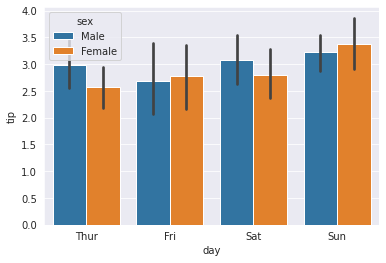

In [47]:
# 아래 차트를 통해 얻을수 있는 의미
# 요일이라는 명목형변수(문자형변수)와 성별이라는 명목형 변수에 따라 팁이 달라짐
ax = sns.barplot(x="day", y="tip", hue="sex", data=df)

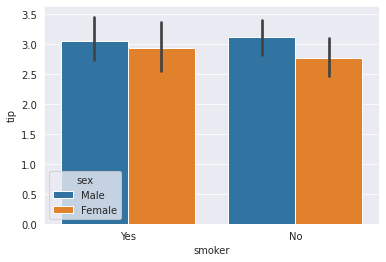

In [49]:
def barplot2(var1, var2):
  ax = sns.barplot(x=var1, y="tip", hue=var2, data=df)

barplot2('smoker', 'sex')

# 교재 194P 더미변수

In [52]:
import pandas as pd

# 중복 값 확인, unique 값을 각각의 변수로 만들어 해당되는 변수에 1값을 부여
print(df['day'].unique())
pd.get_dummies(df['day'])

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']


,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
239,0,0,1,0
240,0,0,1,0
241,0,0,1,0
242,0,0,1,0


In [56]:
pd.get_dummies(data=df, columns=['day'], prefix='d')

,total_bill,tip,sex,smoker,time,size,d_Thur,d_Fri,d_Sat,d_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,0,0,1,0
240,27.18,2.00,Female,Yes,Dinner,2,0,0,1,0
241,22.67,2.00,Male,Yes,Dinner,2,0,0,1,0
242,17.82,1.75,Male,No,Dinner,2,0,0,1,0


- 더미변수나 원핫인코딩이나 모두 문자를 숫자로 변환하는 방법
- x변수는 일반적으로 더미변수화 시킴
- y변수는 원핫인코딩 해야 함.


In [54]:
# 196p, 원-핫 인코딩은 여러개의 비트중 한개에 힘을 주는 것
# 더미변수와 차이점은 더미변수는 여러개의 필드
# 원핫인코딩은 한개의 필드
from sklearn.preprocessing import LabelEncoder

# 원핫 인코딩 하기 전에 숫자로 변환하는 과정, if로 일일이 작업해도 됌
encoder=LabelEncoder()
x=df['day']
encoder.fit(x)
x = encoder.transform(x)
x

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [55]:
from sklearn.preprocessing import OneHotEncoder

one_encoder=OneHotEncoder()
x=df['day']
one_encoder.fit(x)
x = one_encoder.transform(x)
x

ValueError: ignored